# Objetivo: criar modelo de previsão para Strength usando RMSE como critério

#### Disponível em: https://www.kaggle.com/competitions/playground-series-s3e9/overview

## Importando modelos

In [395]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importando Dataset e Visão geral do Dataset

In [396]:
df=pd.read_csv(r"D:\Desktop\GitHub\zhangwellington\Regression with a Tabular Concrete Strength Dataset\train.csv")
display(df.info())
display(df.describe())
display(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB


None

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...,...
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61


## Análise de Outliers

#### Boxplots

<Figure size 432x288 with 0 Axes>

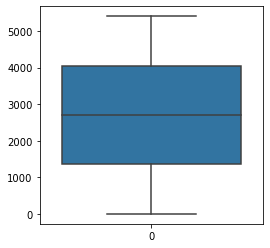

<Figure size 432x288 with 0 Axes>

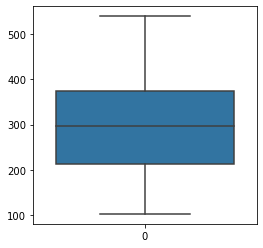

<Figure size 432x288 with 0 Axes>

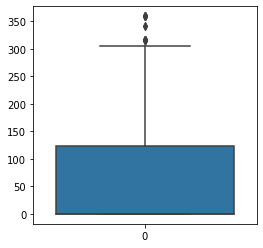

<Figure size 432x288 with 0 Axes>

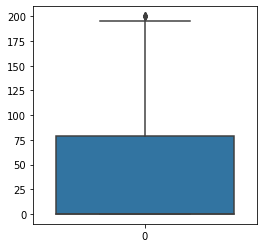

<Figure size 432x288 with 0 Axes>

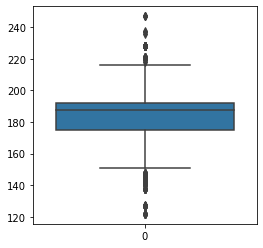

<Figure size 432x288 with 0 Axes>

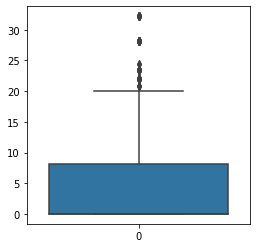

<Figure size 432x288 with 0 Axes>

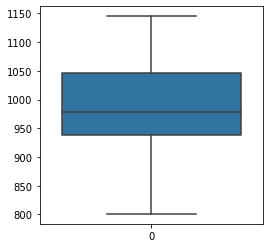

<Figure size 432x288 with 0 Axes>

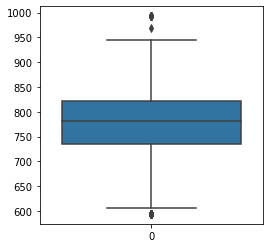

<Figure size 432x288 with 0 Axes>

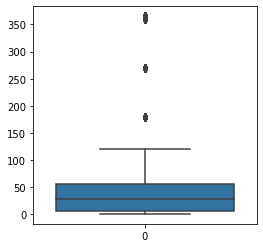

<Figure size 432x288 with 0 Axes>

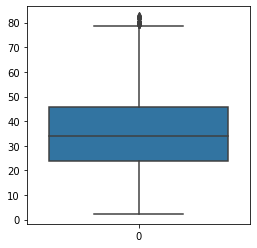

<AxesSubplot:>

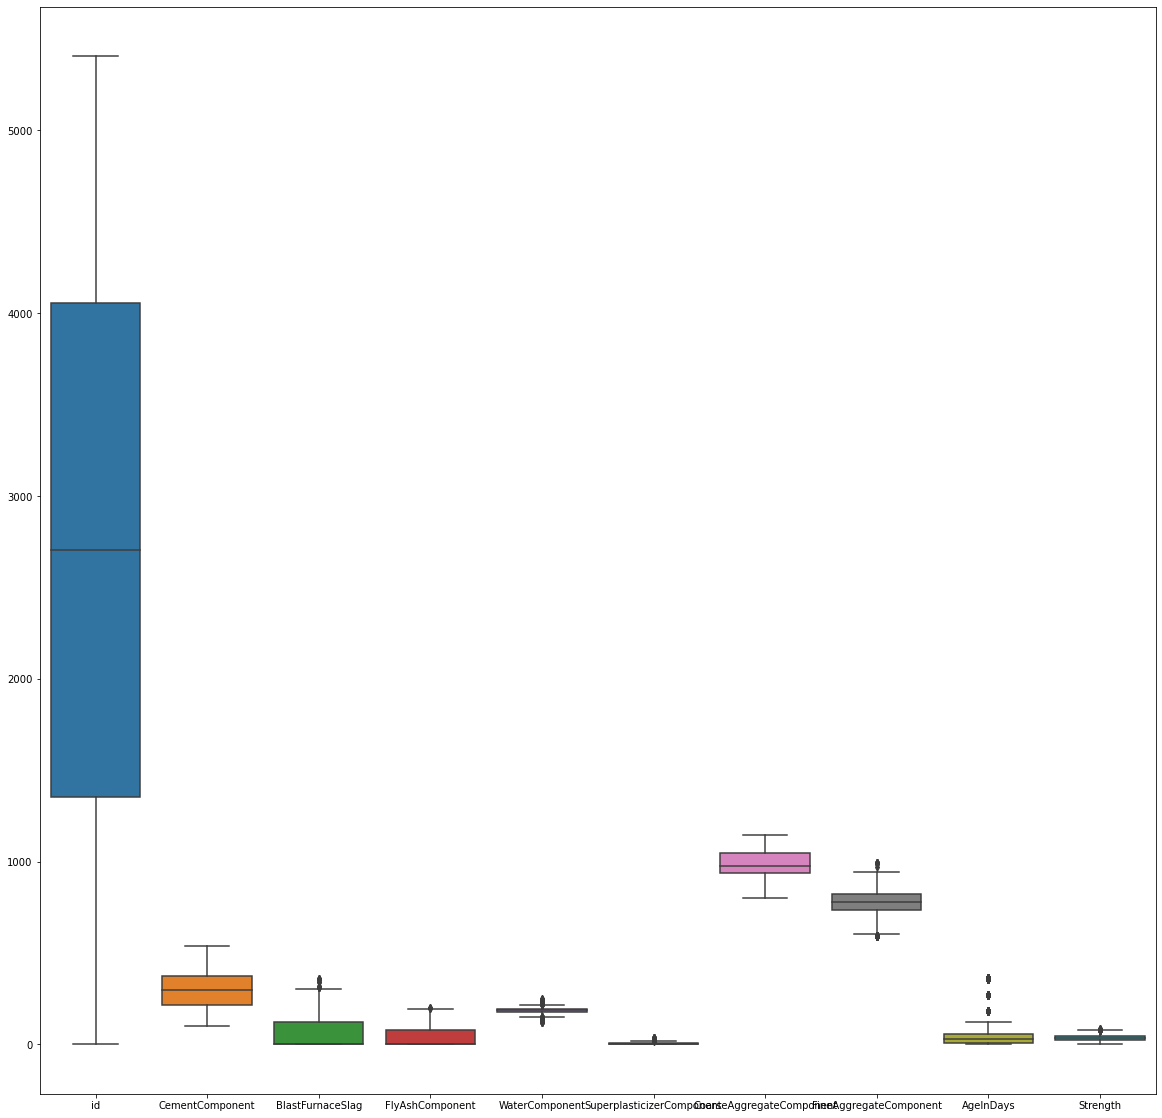

In [397]:
for column in df.columns:
    plt.clf()
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df[column])
    plt.show()

plt.figure(figsize=(20,20))
sns.boxplot(data=df)

### Tabela de Outliers por Coluna

In [398]:
outliers=[]
perc_outliers=[]
coluna=[]
for column in df.columns:
    q3=df[column].quantile(0.75)
    q1=df[column].quantile(0.25)
    amp=q3-q1
    lim_sup=q3+1.5*amp
    lim_inf=q1-1.5*amp
    LS=df[column]>lim_sup
    LI=df[column]<lim_inf
    outliers.append(LS.sum()+LI.sum())
    perc_outliers.append(round((LS.sum()+LI.sum())/df[column].count()*100,2))
    coluna.append(column)
df_outliers=pd.DataFrame({'Coluna':coluna,'Outliers':outliers,'Outliers (%)':perc_outliers})
df_outliers

,Coluna,Outliers,Outliers (%)
0,id,0,0.00
1,CementComponent,0,0.00
2,BlastFurnaceSlag,21,0.39
3,FlyAshComponent,5,0.09
4,WaterComponent,483,8.93
5,SuperplasticizerComponent,75,1.39
6,CoarseAggregateComponent,0,0.00
7,FineAggregateComponent,153,2.83
8,AgeInDays,467,8.64
9,Strength,33,0.61


### Tratando os Outliers

In [399]:
index=[]
for column in df.columns:
    q3=df[column].quantile(0.75)
    q1=df[column].quantile(0.25)
    amp=q3-q1
    lim_sup=q3+1.5*amp
    lim_inf=q1-1.5*amp
    LS=df[column]>lim_sup
    LI=df[column]<lim_inf
    for i in df[~(LS|LI)].index.to_list():
        index.append(i)
index=np.unique(index)
print(len(index))
df2=pd.DataFrame(df,index=index)

5407


In [400]:
df.index.difference(df2.index)

RangeIndex(start=0, stop=0, step=1)

# Análise Exploratória

#### Histogramas

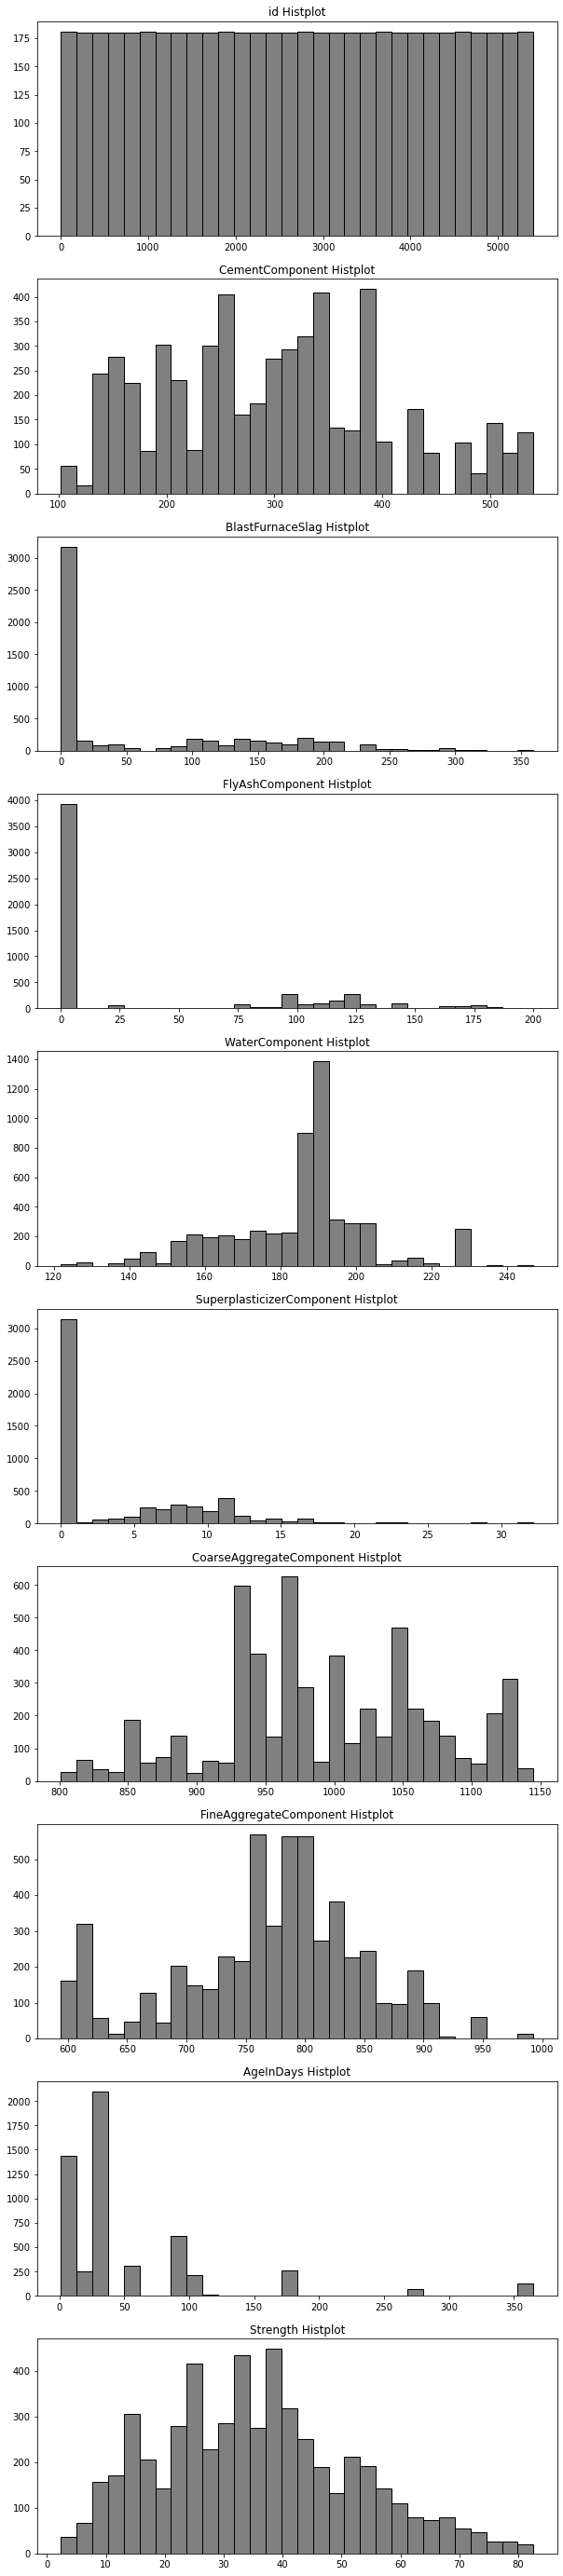

In [401]:
fig, axs = plt.subplots(10,1,figsize=(10,50))
i=0
for column in df.columns:
    axs[i].hist(df[column],bins=30,edgecolor='black',color='gray')
    axs[i].set_title(column+' Histplot')
    i+=1


#### Correlação

<AxesSubplot:>

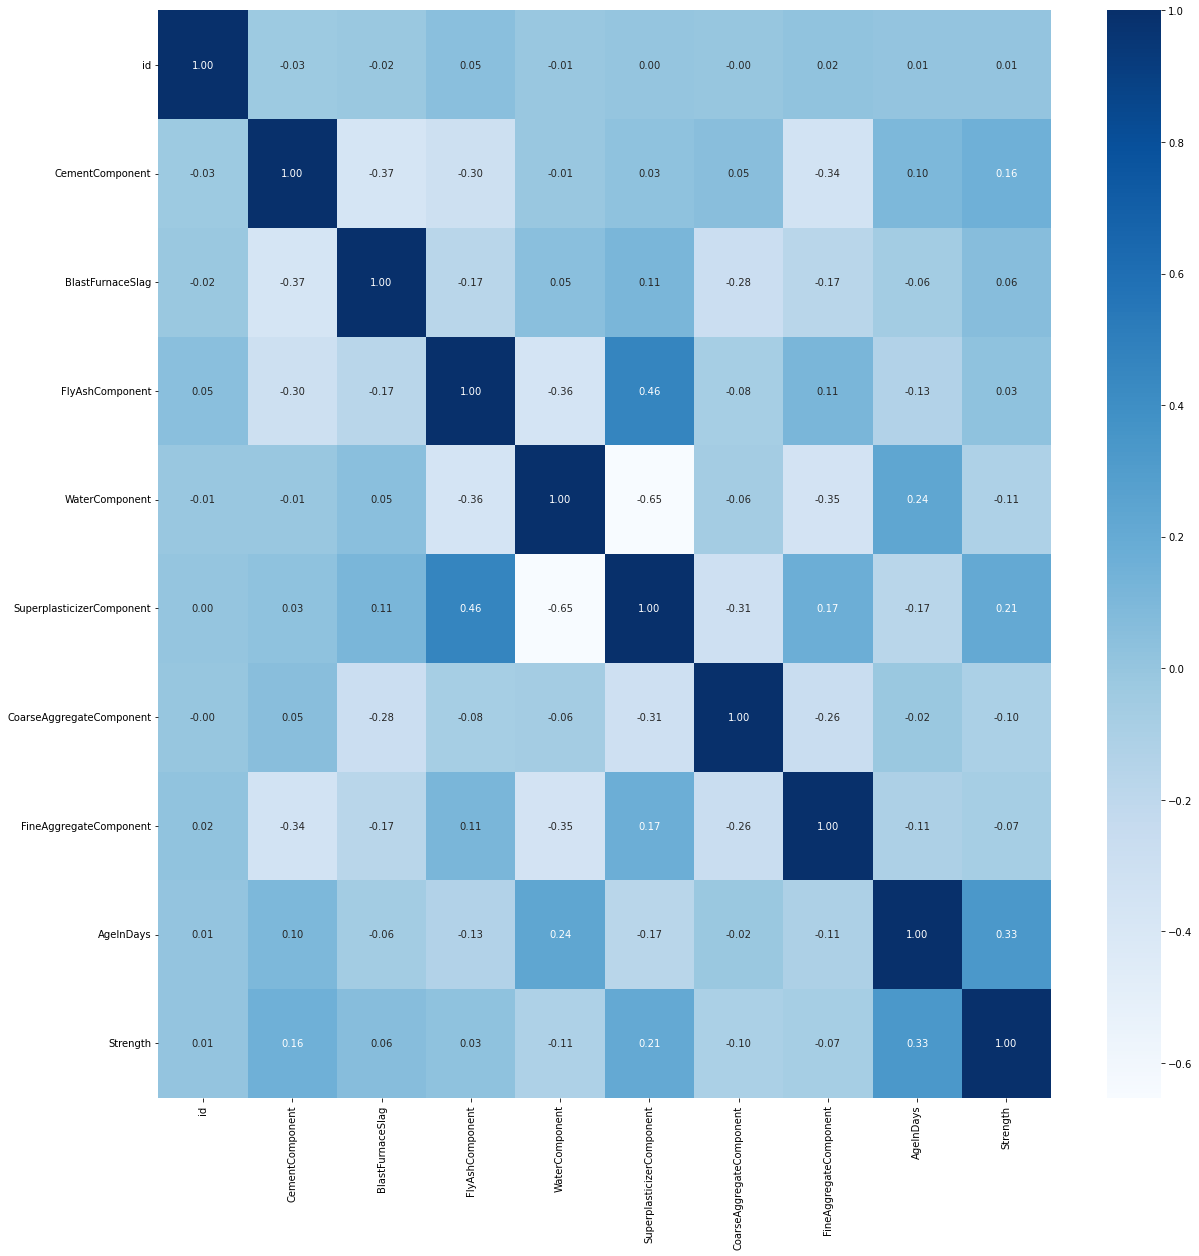

In [402]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')

#### Distribuição

id
CementComponent
BlastFurnaceSlag
FlyAshComponent
WaterComponent
SuperplasticizerComponent
CoarseAggregateComponent
FineAggregateComponent
AgeInDays
Strength


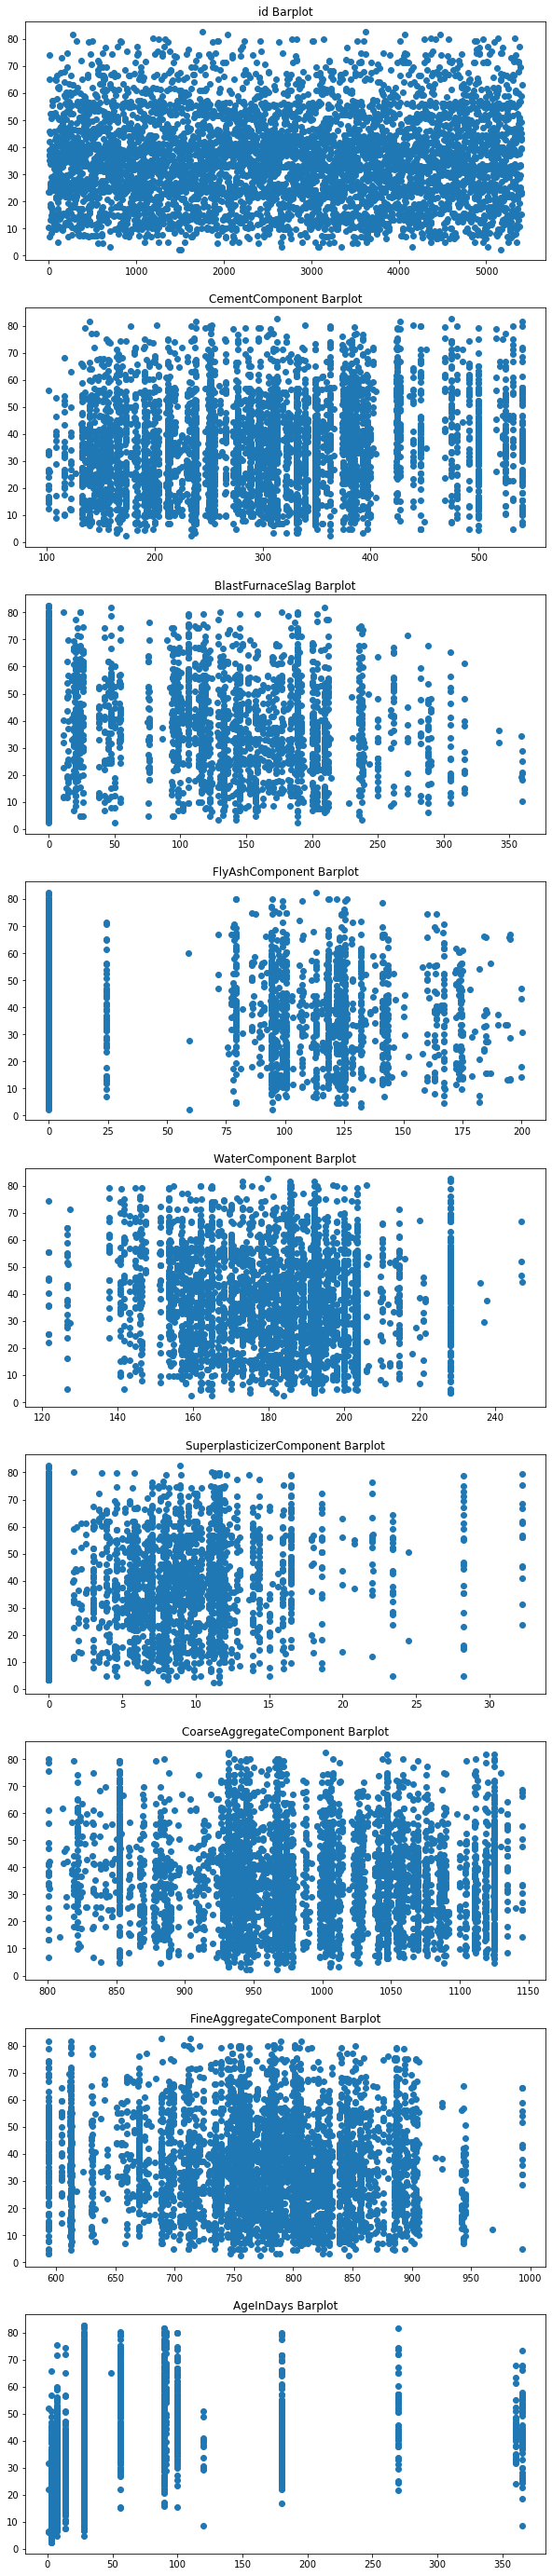

In [403]:
fig, axs = plt.subplots(9,1,figsize=(10,50))
i=0
for column in df.columns:
    print(column)
    if str(column)!='Strength':
        axs[i].scatter(df[column],df.Strength)
        axs[i].set_title(column+' Barplot')
        i+=1

## Separando em dados de treino e teste

In [404]:
X=df.drop('Strength',axis=1)
Y=df['Strength']
display(X)
display(Y)

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90
...,...,...,...,...,...,...,...,...,...
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28


0       10.38
1       23.52
2       36.96
3       39.05
4       74.19
        ...  
5402    15.42
5403    49.20
5404    39.30
5405    39.61
5406    63.14
Name: Strength, Length: 5407, dtype: float64

## Padronizando os dados

In [405]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [406]:
X

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,-1.731731,2.140020,-0.702680,-0.583751,0.049890,-0.721821,1.724109,-2.009960,-0.696447
1,-1.731090,-1.479876,1.323454,2.035299,0.319929,0.683717,-0.324092,-1.628853,-0.339306
2,-1.730449,-0.096355,0.912233,-0.583751,0.033688,-0.721821,1.075944,0.305903,-0.339306
3,-1.729808,0.045787,0.208481,-0.583751,2.318215,-0.721821,-0.777807,-1.285856,4.474945
4,-1.729168,-1.347209,2.126714,-0.583751,0.373937,-0.721821,-0.733732,0.126782,0.546402
...,...,...,...,...,...,...,...,...,...
5402,1.729168,1.391402,-0.414945,0.863136,-1.246295,1.316209,-0.324092,-0.752306,-0.696447
5403,1.729808,0.481691,-0.702680,-0.583751,0.968022,-0.721821,-0.233349,0.048020,1.832107
5404,1.730449,-0.031918,-0.702680,-0.583751,0.033688,-0.721821,1.091500,-0.151426,-0.339306
5405,1.731090,0.728071,0.417089,-0.583751,-1.213890,1.298640,-0.469281,-1.376051,-0.339306


## Quebrando em Dataset de treino e teste

In [407]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

## Usando Regressão Linear

In [408]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
model=linear.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
y_pred=model.predict(x_test)

### Avaliação do modelo

In [409]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE para treino é de: ' + str(rmse_train))
print('RMSE para teste é de: ' + str(rmse_test))

RMSE para treino é de: 14.56816317162034
RMSE para teste é de: 14.605046980544781


## Usando Árvore de Decisão

### Variando parâmetros max_leaf_nodes e max_depth

In [410]:
from sklearn.tree import DecisionTreeRegressor
depth_leaf=[]
rmse=[]
for i in range(2,10,1):
    for j in range(2,20,1):
        tree=DecisionTreeRegressor(max_depth=i, max_leaf_nodes=j, random_state=1)
        model=tree.fit(x_train,y_train)
        y_pred_train=model.predict(x_train)
        y_pred=model.predict(x_test)
        
        rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
        rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
        print('max_depth='+str(i)+' e max_leaf_nodes=' +str(j))
        print('RMSE de treino é de: ' + str(rmse_train))
        print('RMSE de teste é de: ' + str(rmse_test))
        print('----------------------------------------')
        depth_leaf.append([i,j])
        rmse.append(rmse_test)

max_depth=2 e max_leaf_nodes=2
RMSE de treino é de: 13.751753734416491
RMSE de teste é de: 13.483652170308954
----------------------------------------
max_depth=2 e max_leaf_nodes=3
RMSE de treino é de: 13.284177224122226
RMSE de teste é de: 13.091535328771144
----------------------------------------
max_depth=2 e max_leaf_nodes=4
RMSE de treino é de: 13.07427834687634
RMSE de teste é de: 13.036158267336665
----------------------------------------
max_depth=2 e max_leaf_nodes=5
RMSE de treino é de: 13.07427834687634
RMSE de teste é de: 13.036158267336665
----------------------------------------
max_depth=2 e max_leaf_nodes=6
RMSE de treino é de: 13.07427834687634
RMSE de teste é de: 13.036158267336665
----------------------------------------
max_depth=2 e max_leaf_nodes=7
RMSE de treino é de: 13.07427834687634
RMSE de teste é de: 13.036158267336665
----------------------------------------
max_depth=2 e max_leaf_nodes=8
RMSE de treino é de: 13.07427834687634
RMSE de teste é de: 13.03615

max_depth=5 e max_leaf_nodes=10
RMSE de treino é de: 12.386923629945287
RMSE de teste é de: 12.499029037384943
----------------------------------------
max_depth=5 e max_leaf_nodes=11
RMSE de treino é de: 12.33264083530466
RMSE de teste é de: 12.412694481662044
----------------------------------------
max_depth=5 e max_leaf_nodes=12
RMSE de treino é de: 12.287599389717629
RMSE de teste é de: 12.389716396280281
----------------------------------------
max_depth=5 e max_leaf_nodes=13
RMSE de treino é de: 12.242736186873557
RMSE de teste é de: 12.407013343735285
----------------------------------------
max_depth=5 e max_leaf_nodes=14
RMSE de treino é de: 12.202911925047479
RMSE de teste é de: 12.376104906913413
----------------------------------------
max_depth=5 e max_leaf_nodes=15
RMSE de treino é de: 12.167005210605854
RMSE de teste é de: 12.436205639385637
----------------------------------------
max_depth=5 e max_leaf_nodes=16
RMSE de treino é de: 12.144685448206303
RMSE de teste é d

max_depth=8 e max_leaf_nodes=14
RMSE de treino é de: 12.202911925047479
RMSE de teste é de: 12.376104906913413
----------------------------------------
max_depth=8 e max_leaf_nodes=15
RMSE de treino é de: 12.167005210605854
RMSE de teste é de: 12.436205639385637
----------------------------------------
max_depth=8 e max_leaf_nodes=16
RMSE de treino é de: 12.099808948950923
RMSE de teste é de: 12.467197362574312
----------------------------------------
max_depth=8 e max_leaf_nodes=17
RMSE de treino é de: 12.076889736582997
RMSE de teste é de: 12.448249635629715
----------------------------------------
max_depth=8 e max_leaf_nodes=18
RMSE de treino é de: 12.054403118800517
RMSE de teste é de: 12.44707504517252
----------------------------------------
max_depth=8 e max_leaf_nodes=19
RMSE de treino é de: 12.034258426376113
RMSE de teste é de: 12.471231821907773
----------------------------------------
max_depth=9 e max_leaf_nodes=2
RMSE de treino é de: 13.751753734416491
RMSE de teste é de

#### Escolhendo os melhores parâmetros

In [411]:
index=rmse.index(min(rmse))
print('Modelo quer performou melhor foi para max_depth='+str(depth_leaf[index][0])+
      ' e max_leaf_nodes='+str(depth_leaf[index][1])+' com RMSE='+str(round(min(rmse),3)))

Modelo quer performou melhor foi para max_depth=4 e max_leaf_nodes=15 com RMSE=12.375


### Usando Random Forest variando n_estimators

In [412]:
from sklearn.ensemble import RandomForestRegressor
rmse=[]
n_estimator=[]
for i in range(1,1000,100):
    print('n_estimators='+str(i))
    n_estimator.append(i)
    forest=RandomForestRegressor(n_estimators=i, max_leaf_nodes=15, max_depth=4, random_state=1)
    model=forest.fit(x_train,y_train)

    y_pred_train=model.predict(x_train)
    y_pred=model.predict(x_test)
    rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
    rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(rmse_test)

n_estimators=1
n_estimators=101
n_estimators=201
n_estimators=301
n_estimators=401
n_estimators=501
n_estimators=601
n_estimators=701
n_estimators=801
n_estimators=901


Text(0, 0.5, 'RMSE')

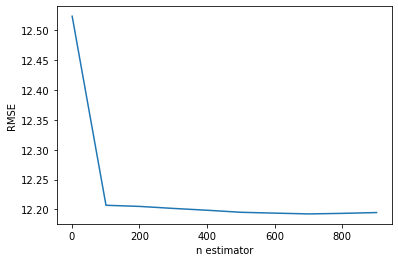

In [413]:
plt.plot(n_estimator,rmse)
plt.xlabel('n estimator')
plt.ylabel('RMSE')

In [414]:
print('Valor mínimo de RMSE obtido por este método foi de: '+ str(round(min(rmse),3)))

Valor mínimo de RMSE obtido por este método foi de: 12.192


### Usando LGBM

In [415]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
num_leaves=[]
rmse=[]
for i in range(20,101,10):
    model=LGBMRegressor(max_depth=4,num_leaves=14,min_child_samples=i,random_state=1)
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(rmse_test)
    num_leaves.append(i)

Text(0, 0.5, 'RMSE')

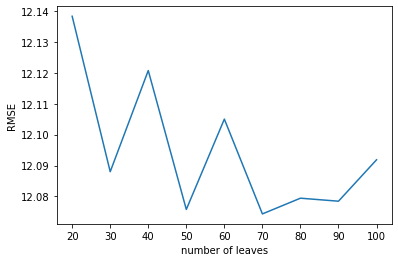

In [416]:
plt.plot(num_leaves,rmse)
plt.xlabel('number of leaves')
plt.ylabel('RMSE')

In [417]:
print('Valor mínimo de RMSE obtido por este método foi de: '+ str(round(min(rmse),3)))

Valor mínimo de RMSE obtido por este método foi de: 12.074


### O LGBM obteve o melhor resultado, com RMSE=12.074. Vamos prever os dados do test.csv com este modelo.

## Gerando as previsões

### Importando e padronizando o dataset

In [451]:
df2=pd.read_csv(r"D:\Desktop\GitHub\zhangwellington\Regression with a Tabular Concrete Strength Dataset\test.csv")
display(df2)
coluna=df2.columns
x_test=StandardScaler().fit_transform(df2)
x_test=pd.DataFrame(x_test,columns=coluna)

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28
...,...,...,...,...,...,...,...,...,...
3600,9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28
3601,9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28
3602,9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28
3603,9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3


### Fazendo a previsão

In [455]:
y_test=model.predict(x_test)
df3=pd.DataFrame({'Strength':y_test})
df3

,Strength
0,50.484844
1,18.521820
2,34.258440
3,47.324140
4,34.035814
...,...
3600,32.501468
3601,36.122162
3602,41.320342
3603,37.106889


### Gerando o dataset de saída

In [459]:
df4=pd.concat([df2,df3],axis=1)
df4

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56,50.484844
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7,18.521820
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28,34.258440
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100,47.324140
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,34.035814
...,...,...,...,...,...,...,...,...,...,...
3600,9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28,32.501468
3601,9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,36.122162
3602,9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28,41.320342
3603,9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,37.106889


# Fim do código